In [0]:
#!pip install tensorflow-gpu

In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import h5py
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from sklearn import metrics
from tensorflow.keras import utils 
from tensorflow.keras.initializers import he_normal

In [6]:
from google.colab import drive
drive.mount('/gdrive')
import glob

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
#Load the file froom google drive
h5f = h5py.File('/gdrive/My Drive/Colab Notebooks/R7/Lab/External/SVHN_single_grey1.h5', 'r')

## Understand the basic Image Classification pipeline and the data-driven approach(train/predict stages)

Data fetching and understand the train/test splits. (5 points)

In [0]:
#Split train and test dataset
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
#Close h5f file after read complete
h5f.close()

In [71]:
#Understand the shape of train and test data
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)


X_train shape:  (42000, 32, 32)
y_train shape:  (42000,)


In [72]:
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_test shape:  (18000, 32, 32)
y_test shape:  (18000,)


**Print training image**

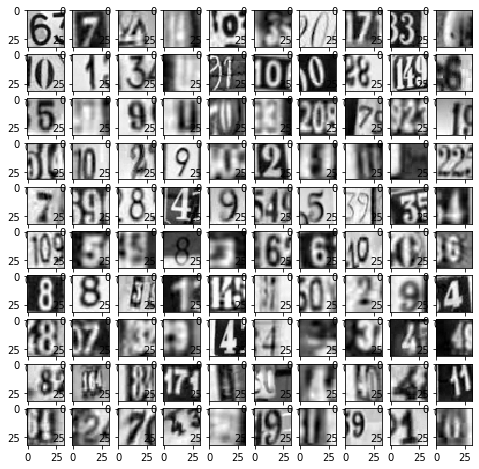

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

**Print test image**

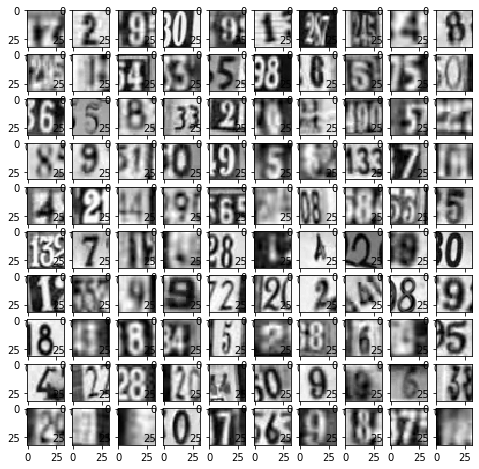

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

# Implement and apply a deep neural network classifier including (15 points)

In [0]:
#Normalization
X_train/=255
X_test/=255

In [0]:
#X_train

In [0]:
X_train=X_train.reshape(X_train.shape[0],1024).astype('float32')
X_test=X_test.reshape(X_test.shape[0],1024).astype('float32')

In [78]:
X_train.shape

(42000, 1024)

In [79]:
print("Training Label: ",np.unique(y_train))
print("Testing Label: ",np.unique(y_train))

Training Label:  [0 1 2 3 4 5 6 7 8 9]
Testing Label:  [0 1 2 3 4 5 6 7 8 9]


### Apply One-Hot Encoding on tagret variable

In [80]:
n_classes = len(np.unique(y_test))
y_train = utils.to_categorical(y_train, num_classes= n_classes)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
n_classes_test = len(np.unique(y_test))
y_test = utils.to_categorical(y_test, num_classes=n_classes_test)
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

### Model

In [0]:
keras.backend.clear_session()
model = Sequential()

model.add(Dense(1024, input_shape=(1024,),kernel_initializer= 'glorot_uniform',activation='relu'))
model.add(Dense(1024, input_shape=(1024,),kernel_initializer= 'glorot_uniform',activation='relu'))
model.add(Dense(1024, input_shape=(1024,),kernel_initializer= 'glorot_uniform',activation='relu'))
model.add(Dense(n_classes, input_shape=(1024,),kernel_initializer= 'glorot_uniform',activation='softmax'))

In [0]:
opt = keras.optimizers.SGD(lr=0.001)
#opt = keras.optimizers.Adam(learning_rate=0.001) 
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 3,159,050
Trainable params: 3,159,050
Non-trainable params: 0
_________________________________________________________________


In [85]:
res = model.fit(x=X_train, y=y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 134us/sample - loss: 2.2957 - accuracy: 0.1216 - val_loss: 2.2864 - val_accuracy: 0.1793
Epoch 2/100
42000/42000 [==============================] - 5s 130us/sample - loss: 2.2813 - accuracy: 0.1720 - val_loss: 2.2784 - val_accuracy: 0.1582
Epoch 3/100
42000/42000 [==============================] - 5s 130us/sample - loss: 2.2699 - accuracy: 0.2100 - val_loss: 2.2653 - val_accuracy: 0.2237
Epoch 4/100
42000/42000 [==============================] - 5s 128us/sample - loss: 2.2570 - accuracy: 0.2435 - val_loss: 2.2524 - val_accuracy: 0.2241
Epoch 5/100
42000/42000 [==============================] - 5s 129us/sample - loss: 2.2429 - accuracy: 0.2804 - val_loss: 2.2349 - val_accuracy: 0.3039
Epoch 6/100
42000/42000 [==============================] - 5s 128us/sample - loss: 2.2257 - accuracy: 0.3115 - val_loss: 2.2169 - val_accuracy: 0.3253
Epoch 7/100
42000/42000 [===================

In [86]:
Score=model.evaluate(X_test,y_test)

18000/18000 [==============================] - 1s 72us/sample - loss: 0.7171 - accuracy: 0.7913


In [87]:
Score

[0.7171482424736023, 0.79127777]

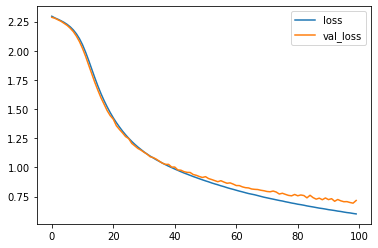

In [88]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(res.history['loss'], label='loss')
plt.plot(res.history['val_loss'], label='val_loss')
plt.legend()

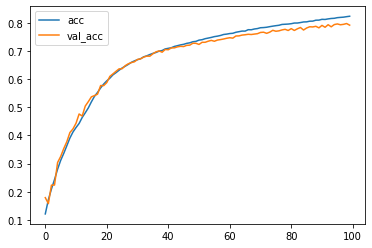

In [89]:
# Plot the training and test accuracy
plt.plot(res.history['accuracy'], label='acc')
plt.plot(res.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
#Predicated label
y_predict = model.predict(X_test)
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))

In [0]:
#Actual label
y_actual = []
for val in y_test:
  y_actual.append(np.argmax(val))


In [92]:
cm = metrics.confusion_matrix(y_actual,y_pred)
print(cm)

[[1534   39   23   17   20   10   24   73    9   65]
 [  22 1549   35   23   37    4   14  115    8   21]
 [  12   55 1431   23   23    8    4  196   15   36]
 [  27   83   61 1246   17  110    7  115   20   33]
 [  33   97   45   20 1474   13   31   38    7   54]
 [  43   52   29  118   11 1320   51   48   34   62]
 [  85   41   27   14   65   64 1413   37   60   26]
 [   9   59   36    9    5    5    8 1650    4   23]
 [  68   81   51   49   24   59   87   48 1240  105]
 [  83   65   40   38   16   30   10  102   34 1386]]


In [135]:
print(metrics.classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1814
           1       0.73      0.85      0.78      1828
           2       0.80      0.79      0.80      1803
           3       0.80      0.72      0.76      1719
           4       0.87      0.81      0.84      1812
           5       0.81      0.75      0.78      1768
           6       0.86      0.77      0.81      1832
           7       0.68      0.91      0.78      1808
           8       0.87      0.68      0.76      1812
           9       0.77      0.77      0.77      1804

    accuracy                           0.79     18000
   macro avg       0.80      0.79      0.79     18000
weighted avg       0.80      0.79      0.79     18000



# Build model2 with batch normalization and dropout

In [0]:
keras.backend.clear_session()
model2 = Sequential()

model2.add(Dense(1024, input_shape=(1024,),kernel_initializer= he_normal(seed=None),activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(512, input_shape=(1024,),kernel_initializer= he_normal(seed=None),activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(256, input_shape=(1024,),kernel_initializer= he_normal(seed=None),activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(128, input_shape=(1024,),kernel_initializer= he_normal(seed=None),activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

#Output layer
model2.add(Dense(n_classes, input_shape=(1024,),kernel_initializer= he_normal(seed=None),activation='softmax'))

In [94]:
#opt = keras.optimizers.Adam(learning_rate=0.9)
opt = keras.optimizers.SGD(lr=0.001)
model2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1

In [95]:
res2 = model2.fit(x=X_train, y=y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 10s 227us/sample - loss: 2.7606 - accuracy: 0.1455 - val_loss: 2.0150 - val_accuracy: 0.2990
Epoch 2/100
42000/42000 [==============================] - 9s 207us/sample - loss: 2.3032 - accuracy: 0.2329 - val_loss: 1.6912 - val_accuracy: 0.4359
Epoch 3/100
42000/42000 [==============================] - 9s 216us/sample - loss: 2.0454 - accuracy: 0.3048 - val_loss: 1.5111 - val_accuracy: 0.5172
Epoch 4/100
42000/42000 [==============================] - 9s 206us/sample - loss: 1.8476 - accuracy: 0.3657 - val_loss: 1.3692 - val_accuracy: 0.5751
Epoch 5/100
42000/42000 [==============================] - 9s 220us/sample - loss: 1.7180 - accuracy: 0.4134 - val_loss: 1.2650 - val_accuracy: 0.6125
Epoch 6/100
42000/42000 [==============================] - 9s 209us/sample - loss: 1.6067 - accuracy: 0.4532 - val_loss: 1.1894 - val_accuracy: 0.6379
Epoch 7/100
42000/42000 [==================

In [96]:
Score2=model2.evaluate(X_test,y_test)

18000/18000 [==============================] - 1s 82us/sample - loss: 0.5501 - accuracy: 0.8333


In [97]:
Score2

[0.5500834855635961, 0.8333333]

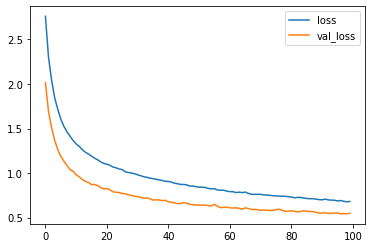

In [98]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(res2.history['loss'], label='loss')
plt.plot(res2.history['val_loss'], label='val_loss')
plt.legend()

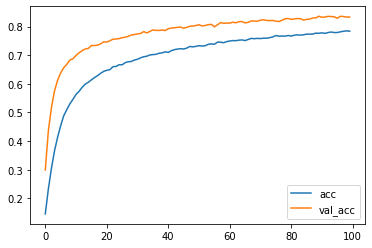

In [99]:
# Plot the training and test accuracy
plt.plot(res2.history['accuracy'], label='acc')
plt.plot(res2.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
#Predicated label
y_predict2 = model2.predict(X_test)
y_pred2 = []
for val in y_predict2:
    y_pred2.append(np.argmax(val))

In [101]:
cm2 = metrics.confusion_matrix(y_actual,y_pred2)
print(cm2)

[[1631   29    3   34   14    6   19   16   17   45]
 [  41 1593   18   44   32    9   11   39   21   20]
 [  24   28 1486   65   17   13   13   63   26   68]
 [  23   40   34 1391   12  121    8   26   40   24]
 [  30   72   25   36 1508   14   40   10   21   56]
 [  24   17    9  101    5 1481   42    6   44   39]
 [  61   34    9   33   29   78 1466    6   91   25]
 [  21   75   48   45    8   16    8 1545   14   28]
 [  49   43   17   79   10   58   71    9 1410   66]
 [  72   39   19   59    9   42   14   20   41 1489]]


In [134]:
print(metrics.classification_report(y_actual, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1814
           1       0.81      0.87      0.84      1828
           2       0.89      0.82      0.86      1803
           3       0.74      0.81      0.77      1719
           4       0.92      0.83      0.87      1812
           5       0.81      0.84      0.82      1768
           6       0.87      0.80      0.83      1832
           7       0.89      0.85      0.87      1808
           8       0.82      0.78      0.80      1812
           9       0.80      0.83      0.81      1804

    accuracy                           0.83     18000
   macro avg       0.84      0.83      0.83     18000
weighted avg       0.84      0.83      0.83     18000



#Build a model with Convolution2D years with Pooling and Early stopping

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Activation,Dropout

In [0]:
#Load the file froom google drive
h5f = h5py.File('/gdrive/My Drive/Colab Notebooks/R7/Lab/External/SVHN_single_grey1.h5', 'r')

#Split train and test dataset
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


#Close h5f file after read complete
h5f.close()

In [104]:
X_train.shape

(42000, 32, 32)

In [105]:
print("Number of samples in training set: ",X_train.shape[0])
print("Number of samples in training set: ",X_test.shape[0])

Number of samples in training set:  42000
Number of samples in training set:  18000


In [106]:
print("Image dimension: ",X_train[0].shape)

Image dimension:  (32, 32)


# Apply One-Hot Encoding on tagret variable before build CNN model

In [107]:
n_classes = len(np.unique(y_test))
y_train = utils.to_categorical(y_train, num_classes= n_classes)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [108]:
n_classes_test = len(np.unique(y_test))
y_test = utils.to_categorical(y_test, num_classes=n_classes_test)
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## Apply Normalization 

In [0]:
X_train/=255
X_test/=255

In [0]:
#X_train

# Reshape

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')

In [112]:
y_train.shape

(42000, 10)

In [113]:
X_train.shape

(42000, 32, 32, 1)

In [0]:
keras.backend.clear_session()

# Define model
cnnModel = Sequential()

#Conv layer
cnnModel.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(32,32,1),activation="relu"))
cnnModel.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(32,32,1),activation="relu"))

#Flatten layer
cnnModel.add(Flatten())
cnnModel.add(Dense(128))
cnnModel.add(Activation('relu'))

# Output Layer
cnnModel.add(Dense(10))
cnnModel.add(Activation('softmax'))

In [124]:
#Compile model
opt = keras.optimizers.SGD(lr=0.001)
cnnModel.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
cnn_res = cnnModel.fit(X_train, y_train, nb_epoch=100, validation_data=(X_test, y_test), callbacks=callback_list, verbose=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 196us/sample - loss: 2.3002 - accuracy: 0.1110 - val_loss: 2.2964 - val_accuracy: 0.1616
Epoch 2/100
42000/42000 [==============================] - 8s 190us/sample - loss: 2.2926 - accuracy: 0.1480 - val_loss: 2.2872 - val_accuracy: 0.1775
Epoch 3/100
42000/42000 [==============================] - 8s 187us/sample - loss: 2.2783 - accuracy: 0.1973 - val_loss: 2.2657 - val_accuracy: 0.2376
Epoch 4/100
42000/42000 [==============================] - 8s 186us/sample - loss: 2.2400 - accuracy: 0.2520 - val_loss: 2.2051 - val_accuracy: 0.2588
Epoch 5/100
42000/42000 [==============================] - 8s 190us/sample - loss: 2.1185 - accuracy: 0.3241 - val_loss: 1.9896 - val_accuracy: 0.3606
Epoch 6/100
42000/42000 [==============================] - 8s 186us/sample - loss: 1.8123 - accuracy: 0.4319 - val_loss: 2.0845 - val_accuracy: 0.2974
Epoch 7/100
42000/42000 [===================

In [125]:
#Evaluate the training accuracy
TrainingScore = cnnModel.evaluate(X_train, y_train)
print(TrainingScore)

42000/42000 [==============================] - 4s 94us/sample - loss: 0.5964 - accuracy: 0.8190
[0.596415138505754, 0.81904763]


In [126]:
#Evaluate the test accuracy
TestScore = cnnModel.evaluate(X_test, y_test)
print(TestScore)

18000/18000 [==============================] - 2s 91us/sample - loss: 0.7174 - accuracy: 0.7940
[0.7174026522901323, 0.794]


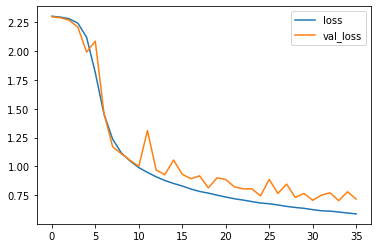

In [127]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(cnn_res.history['loss'], label='loss')
plt.plot(cnn_res.history['val_loss'], label='val_loss')
plt.legend()

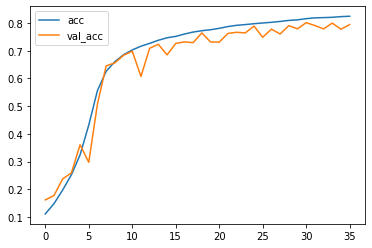

In [128]:
# Plot the training and test accuracy
plt.plot(cnn_res.history['accuracy'], label='acc')
plt.plot(cnn_res.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
#Predicated label
y_predict3 = cnnModel.predict(X_test)
y_pred3 = []
for val in y_predict3:
    y_pred3.append(np.argmax(val))

In [130]:
cnn_cm = metrics.confusion_matrix(y_actual,y_pred3)
print(cnn_cm)

[[1688    9    3   23    9    6   15   29    6   26]
 [ 121 1404   17   72   31   18   17  113   12   23]
 [  70   19 1381   74   22   20    5  149   23   40]
 [  48   18   21 1352    7  134   15   71   22   31]
 [ 123   44   26   40 1436   25   39   31    9   39]
 [  57   11    9  131   10 1428   47   24   25   26]
 [ 183   17    7   30   17   81 1417   14   49   17]
 [  54   39   21   23    4   14    9 1614   10   20]
 [ 143   31   16   97    9   91  101   31 1233   60]
 [ 195   18   15   75   12   68   11   48   23 1339]]


In [133]:
print(metrics.classification_report(y_actual, y_pred3))

              precision    recall  f1-score   support

           0       0.63      0.93      0.75      1814
           1       0.87      0.77      0.82      1828
           2       0.91      0.77      0.83      1803
           3       0.71      0.79      0.74      1719
           4       0.92      0.79      0.85      1812
           5       0.76      0.81      0.78      1768
           6       0.85      0.77      0.81      1832
           7       0.76      0.89      0.82      1808
           8       0.87      0.68      0.76      1812
           9       0.83      0.74      0.78      1804

    accuracy                           0.79     18000
   macro avg       0.81      0.79      0.80     18000
weighted avg       0.81      0.79      0.80     18000

